In [379]:
import pandas as pd
import numpy as np

In [380]:
weather_energy = pd.read_csv('final.csv')
weather_energy.set_index('day',inplace=True)
weather_energy.shape

(827, 15)

In [381]:
weather_energy.head()

,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,IsBankHoliday
day,,,,,,,,,,,,,,,
2011-11-23,6.952692,10.0,5.0,0.0,8.7,2.0,16.0,18.0,25.0,90.0,0.0,1027,7.0,257,0
2011-11-24,8.536480,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,0.0,1028,10.0,205,0
2011-11-25,9.499781,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,0.2,1024,9.0,240,0
2011-11-26,10.267707,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,0.0,1026,10.0,229,1
2011-11-27,10.850805,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,0.3,1021,10.0,258,1


In [382]:
weather_energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 2011-11-23 to 2014-02-26
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_energy         827 non-null    float64
 1   maxtempC           827 non-null    float64
 2   mintempC           827 non-null    float64
 3   totalSnow_cm       827 non-null    float64
 4   sunHour            827 non-null    float64
 5   uvIndex            827 non-null    float64
 6   moon_illumination  827 non-null    float64
 7   WindGustKmph       827 non-null    float64
 8   cloudcover         827 non-null    float64
 9   humidity           827 non-null    float64
 10  precipMM           827 non-null    float64
 11  pressure           827 non-null    int64  
 12  visibility         827 non-null    float64
 13  winddirDegree      827 non-null    int64  
 14  IsBankHoliday      827 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 103.4+ KB


In [383]:
#function to convert time series data to apply supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [384]:
from sklearn.preprocessing import MinMaxScaler

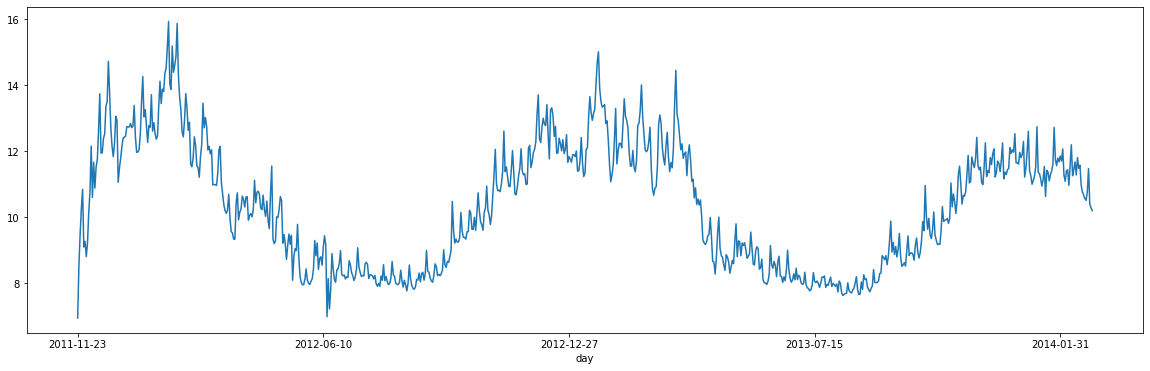

In [385]:
weather_energy["avg_energy"].plot(figsize=(20,6));


In [386]:
weather_energy.shape

(827, 15)

In [387]:
weather_energy.head()

,avg_energy,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,IsBankHoliday
day,,,,,,,,,,,,,,,
2011-11-23,6.952692,10.0,5.0,0.0,8.7,2.0,16.0,18.0,25.0,90.0,0.0,1027,7.0,257,0
2011-11-24,8.536480,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,0.0,1028,10.0,205,0
2011-11-25,9.499781,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,0.2,1024,9.0,240,0
2011-11-26,10.267707,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,0.0,1026,10.0,229,1
2011-11-27,10.850805,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,0.3,1021,10.0,258,1


In [388]:
no_of_timesteps=6
no_of_timesteps_lead=2
reframed = series_to_supervised(weather_energy.values, no_of_timesteps,no_of_timesteps_lead)
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var8(t-6),var9(t-6),var10(t-6),...,var6(t+1),var7(t+1),var8(t+1),var9(t+1),var10(t+1),var11(t+1),var12(t+1),var13(t+1),var14(t+1),var15(t+1)
6,6.952692,10.0,5.0,0.0,8.7,2.0,16.0,18.0,25.0,90.0,...,2.0,32.0,32.0,33.0,85.0,0.00,1019.0,10.0,205.0,0.0
7,8.536480,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,...,2.0,39.0,25.0,78.0,90.0,7.25,1007.0,9.0,143.0,0.0
8,9.499781,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,...,2.0,45.0,21.0,35.0,91.0,7.25,1012.0,9.0,254.0,0.0
9,10.267707,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,...,2.0,52.0,36.0,60.0,91.0,7.25,1004.0,9.0,240.0,1.0
10,10.850805,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,...,2.0,59.0,30.0,67.0,92.0,0.60,1001.0,10.0,246.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,11.490470,10.0,4.0,0.0,10.0,2.0,96.0,48.5,36.0,83.0,...,3.0,48.0,32.0,27.0,84.0,0.00,1009.0,10.0,223.0,1.0
822,11.582159,9.0,1.0,0.0,10.1,3.0,89.0,25.0,19.0,86.0,...,2.0,42.0,44.0,66.0,91.0,0.30,1011.0,9.0,186.0,1.0
823,10.979566,10.0,4.0,0.0,5.0,2.0,82.0,30.0,70.0,90.0,...,2.0,35.0,35.0,44.0,85.0,0.10,1006.0,10.0,175.0,0.0
824,10.781898,10.0,5.0,0.0,6.7,2.0,76.0,25.0,81.0,94.0,...,2.0,28.0,34.0,54.0,87.0,1.10,1001.0,9.0,186.0,0.0


In [389]:
reframed[454:][['var1(t-1)','var1(t)','var1(t+1)']]

,var1(t-1),var1(t),var1(t+1)
460,14.014282,13.059055,12.573332
461,13.059055,12.573332,12.058759
462,12.573332,12.058759,11.990561
463,12.058759,11.990561,12.048499
464,11.990561,12.048499,12.308851
...,...,...,...
821,10.573835,10.518126,10.776242
822,10.518126,10.776242,11.480411
823,10.776242,11.480411,10.411403
824,11.480411,10.411403,10.294997


In [390]:
reframed= reframed.reset_index(drop=True)
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var8(t-6),var9(t-6),var10(t-6),...,var6(t+1),var7(t+1),var8(t+1),var9(t+1),var10(t+1),var11(t+1),var12(t+1),var13(t+1),var14(t+1),var15(t+1)
0,6.952692,10.0,5.0,0.0,8.7,2.0,16.0,18.0,25.0,90.0,...,2.0,32.0,32.0,33.0,85.0,0.00,1019.0,10.0,205.0,0.0
1,8.536480,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,...,2.0,39.0,25.0,78.0,90.0,7.25,1007.0,9.0,143.0,0.0
2,9.499781,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,...,2.0,45.0,21.0,35.0,91.0,7.25,1012.0,9.0,254.0,0.0
3,10.267707,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,...,2.0,52.0,36.0,60.0,91.0,7.25,1004.0,9.0,240.0,1.0
4,10.850805,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,...,2.0,59.0,30.0,67.0,92.0,0.60,1001.0,10.0,246.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,11.490470,10.0,4.0,0.0,10.0,2.0,96.0,48.5,36.0,83.0,...,3.0,48.0,32.0,27.0,84.0,0.00,1009.0,10.0,223.0,1.0
816,11.582159,9.0,1.0,0.0,10.1,3.0,89.0,25.0,19.0,86.0,...,2.0,42.0,44.0,66.0,91.0,0.30,1011.0,9.0,186.0,1.0
817,10.979566,10.0,4.0,0.0,5.0,2.0,82.0,30.0,70.0,90.0,...,2.0,35.0,35.0,44.0,85.0,0.10,1006.0,10.0,175.0,0.0
818,10.781898,10.0,5.0,0.0,6.7,2.0,76.0,25.0,81.0,94.0,...,2.0,28.0,34.0,54.0,87.0,1.10,1001.0,9.0,186.0,0.0


In [391]:
# drop columns we don't want to predict
we_le = len(weather_energy.columns)
col_array=np.arange(0,len(reframed.columns))
reframed=reframed.loc[:,(col_array<we_le*no_of_timesteps+we_le) | (col_array%(we_le)==0)]


In [392]:
reframed.shape

(820, 106)

In [393]:
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),var6(t-6),var7(t-6),var8(t-6),var9(t-6),var10(t-6),...,var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var1(t+1)
0,6.952692,10.0,5.0,0.0,8.7,2.0,16.0,18.0,25.0,90.0,...,25.0,40.0,80.0,90.0,0.50,1010.0,9.0,205.0,0.0,8.813513
1,8.536480,13.0,8.0,0.0,8.7,3.0,9.0,30.0,45.0,92.0,...,32.0,32.0,33.0,85.0,0.00,1019.0,10.0,205.0,0.0,9.227707
2,9.499781,12.0,7.0,0.0,8.7,2.0,2.0,31.0,44.0,87.0,...,39.0,25.0,78.0,90.0,7.25,1007.0,9.0,143.0,0.0,10.145910
3,10.267707,12.0,6.0,0.0,8.2,3.0,5.0,35.0,30.0,90.0,...,45.0,21.0,35.0,91.0,7.25,1012.0,9.0,254.0,0.0,10.780273
4,10.850805,12.0,6.0,0.0,6.8,3.0,11.0,36.0,38.0,85.0,...,52.0,36.0,60.0,91.0,7.25,1004.0,9.0,240.0,1.0,12.163127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,11.490470,10.0,4.0,0.0,10.0,2.0,96.0,48.5,36.0,83.0,...,55.0,32.0,33.0,85.0,0.20,1003.0,9.0,228.0,0.0,10.776242
816,11.582159,9.0,1.0,0.0,10.1,3.0,89.0,25.0,19.0,86.0,...,48.0,32.0,27.0,84.0,0.00,1009.0,10.0,223.0,1.0,11.480411
817,10.979566,10.0,4.0,0.0,5.0,2.0,82.0,30.0,70.0,90.0,...,42.0,44.0,66.0,91.0,0.30,1011.0,9.0,186.0,1.0,10.411403
818,10.781898,10.0,5.0,0.0,6.7,2.0,76.0,25.0,81.0,94.0,...,35.0,35.0,44.0,85.0,0.10,1006.0,10.0,175.0,0.0,10.294997


In [394]:
# reframed.drop(['var1(t)','var1(t+1)','var1(t+2)','var1(t+3)','var1(t+4)','var1(t+5)'],axis=1,inplace=True)

In [395]:
n_train_time = 454; # hours used for training.....
original_n_train_time=n_train_time;
pred_list=[]; #predicted values that will replace the original test_y values
testing_rows=365;
#testing_rows=reframed.shape[0]-original_n_train_time-1
test1 = reframed.values[n_train_time:n_train_time+testing_rows, :] #original testing data, this will later be modified with the predicted data generated by for loop
test_y1 = test1[:, -1] #see comment in above line
batch_size_fit=1
train = reframed.values[:n_train_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test1[:, :-1], test1[:, -1]
# reshape input to be 3D [samples, timesteps, features]


In [396]:
reframed[['var1(t-1)','var1(t)','var1(t+1)']]

,var1(t-1),var1(t),var1(t+1)
0,9.103382,9.274873,8.813513
1,9.274873,8.813513,9.227707
2,8.813513,9.227707,10.145910
3,9.227707,10.145910,10.780273
4,10.145910,10.780273,12.163127
...,...,...,...
815,10.573835,10.518126,10.776242
816,10.518126,10.776242,11.480411
817,10.776242,11.480411,10.411403
818,11.480411,10.411403,10.294997


In [397]:
reframed[454:464][['var1(t-1)','var1(t)','var1(t+1)']]

,var1(t-1),var1(t),var1(t+1)
454,14.014282,13.059055,12.573332
455,13.059055,12.573332,12.058759
456,12.573332,12.058759,11.990561
457,12.058759,11.990561,12.048499
458,11.990561,12.048499,12.308851
459,12.048499,12.308851,12.735907
460,12.308851,12.735907,11.481859
461,12.735907,11.481859,10.860481
462,11.481859,10.860481,10.675248
463,10.860481,10.675248,10.889469


In [398]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_X = scaler.fit_transform(train_X)
#train_X = train_X.reshape((train_X.shape[0], no_of_timesteps, we_le))

print(train_X.shape)

(454, 105)


In [399]:
import keras
from keras.layers import Dense
from keras.models import Sequential
#from keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from pandas import concat
import matplotlib.dates as md

In [400]:
#Create and fit the Multilayer Perceptron Model
model = Sequential()
model.add(Dense(32, input_dim=int(105), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(train_X, train_y, epochs=100, batch_size=2, verbose=2)


# Estimate model performance
trainScore = model.evaluate(train_X, train_y, verbose=0)

Epoch 1/100
227/227 - 0s - loss: 29.6931
Epoch 2/100
227/227 - 0s - loss: 5.8856
Epoch 3/100
227/227 - 0s - loss: 4.5209
Epoch 4/100
227/227 - 0s - loss: 3.5993
Epoch 5/100
227/227 - 0s - loss: 3.8136
Epoch 6/100
227/227 - 0s - loss: 3.1468
Epoch 7/100
227/227 - 0s - loss: 3.1296
Epoch 8/100
227/227 - 0s - loss: 3.0492
Epoch 9/100
227/227 - 0s - loss: 2.8075
Epoch 10/100
227/227 - 0s - loss: 2.6356
Epoch 11/100
227/227 - 0s - loss: 2.3042
Epoch 12/100
227/227 - 0s - loss: 1.7185
Epoch 13/100
227/227 - 0s - loss: 1.8917
Epoch 14/100
227/227 - 0s - loss: 1.8561
Epoch 15/100
227/227 - 0s - loss: 1.5832
Epoch 16/100
227/227 - 0s - loss: 1.8866
Epoch 17/100
227/227 - 0s - loss: 1.4668
Epoch 18/100
227/227 - 0s - loss: 1.3786
Epoch 19/100
227/227 - 0s - loss: 1.3570
Epoch 20/100
227/227 - 0s - loss: 1.2967
Epoch 21/100
227/227 - 0s - loss: 1.5035
Epoch 22/100
227/227 - 0s - loss: 1.0483
Epoch 23/100
227/227 - 0s - loss: 0.9709
Epoch 24/100
227/227 - 0s - loss: 1.0220
Epoch 25/100
227/227 - 0

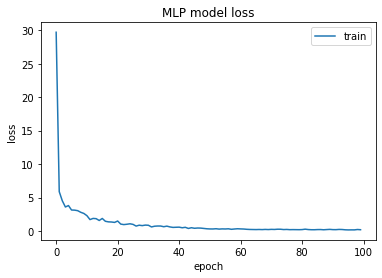

In [401]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.title('MLP model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [402]:

y_true = []
for j in range(0,testing_rows+1):
    print('Loop # ',j)
    print(reframed.values[n_train_time,(len(reframed.columns)-1-we_le)])
    test = reframed.values[n_train_time:n_train_time+1, :]
    test_X = test[:, :-1]
    test_y = test[:, -1]
    
    print("check test x--->")
    print(reframed[n_train_time:n_train_time+1])
    print("check test ends x --->")
    test_X = scaler.transform(test_X)
    #test_X = test_X.reshape((test_X.shape[0], no_of_timesteps, we_le))
    yhat = model.predict(test_X,batch_size=batch_size_fit)
    if n_train_time+1<len(reframed):
        for k in range(0,len(reframed.columns),we_le):
            if((k+we_le)<(len(reframed.columns)-1)):
                reframed.values[n_train_time+1,k]=reframed.values[n_train_time,(k+we_le)];
        print('starts here')
        print(n_train_time+1,(len(reframed.columns)-1-we_le))
        print(reframed.values[n_train_time+1,(len(reframed.columns)-1-we_le)])
        print('ends here')
        reframed.values[n_train_time+1,(len(reframed.columns)-1-we_le)]=yhat;
        print('starts here')
        print(n_train_time+1,(len(reframed.columns)-1-we_le))
        print(reframed.values[n_train_time+1,(len(reframed.columns)-1-we_le)])
        print('ends here')
    #     reframed.values[n_train_time+1,0]=yhat;
    n_train_time=n_train_time+1
    pred_list=np.append(pred_list,yhat)
    y_true=np.append(y_true,test_y)
    print(reframed[n_train_time-1:n_train_time])
    print(yhat)
n_train_time=original_n_train_time

Loop #  0
13.05905549357143
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
454  11.385007       10.0        0.0        0.0       10.2        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
454       59.0        9.0       20.0        81.0  ...    100.0     29.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
454     86.0      86.0       0.4    1026.0       8.0     182.0       0.0   

     var1(t+1)  
454  12.573332  

[1 rows x 106 columns]
check test ends x --->
starts here
455 90
12.573332295915002
ends here
starts here
455 90
11.687705993652344
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
454  11.385007       10.0        0.0        0.0       10.2        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
454       59.0        9.0       20.0        81.0  ...    100.0     29.0   

     var9(t)  var10(t)  var11

starts here
462 90
10.860480589622815
ends here
starts here
462 90
10.613670349121094
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
461  11.687706        6.0        2.0        0.0        5.4        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
461       93.0       26.0       86.0        92.0  ...     53.0     24.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
461     34.0      86.0       0.0    1015.0       9.0      95.0       0.0   

     var1(t+1)  
461  10.860481  

[1 rows x 106 columns]
[[10.61367]]
Loop #  8
10.613670349121094
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
462  11.266418        7.0        2.0        0.0       10.1        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
462       87.0       24.0       62.0        86.0  ...     46.0     16.0   

     var9(t)  var10(t)  var11(t)  var1

starts here
471 90
11.786081673764748
ends here
starts here
471 90
9.828601837158203
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
470   9.615622        9.0        7.0        0.0        5.6        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
470       32.0       17.0       99.0        93.0  ...      8.0     25.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
470     55.0      83.0       0.4    1010.0      10.0     338.0       0.0   

     var1(t+1)  
470  11.786082  

[1 rows x 106 columns]
[[9.828602]]
Loop #  17
9.828601837158203
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
471   9.611945       10.0        7.0        0.0        5.6        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
471       26.0       13.0       98.0        96.0  ...     15.0     16.0   

     var9(t)  var10(t)  var11(t)  var12

starts here
479 90
12.071172692490777
ends here
starts here
479 90
10.157330513000488
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
478    9.86931        8.0        0.0        0.0        6.0        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
478       22.0       34.0       89.0        87.0  ...     62.0     23.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
478     65.0      80.0       0.2    1016.0       9.0      99.0       0.0   

     var1(t+1)  
478  12.071173  

[1 rows x 106 columns]
[[10.1573305]]
Loop #  25
10.157330513000488
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
479   9.950614        5.0        4.0        0.0        6.0        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
479       29.0       40.0       93.0        97.0  ...     69.0     39.0   

     var9(t)  var10(t)  var11(t)  v

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
487    11.3938        1.0       -1.0        2.2        6.3        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
487       83.0       29.0       89.0        89.0  ...     77.0     21.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
487     58.0      80.0       0.8    1011.0       7.0      31.0       1.0   

     var1(t+1)  
487  11.932721  

[1 rows x 106 columns]
check test ends x --->
starts here
488 90
11.932720888835489
ends here
starts here
488 90
10.453986167907715
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
487    11.3938        1.0       -1.0        2.2        6.3        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
487       83.0       29.0       89.0        89.0  ...     77.0     21.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  

starts here
497 90
10.90038792317525
ends here
starts here
497 90
9.21375846862793
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
496   9.710494        7.0       -2.0        0.0       11.6        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
496       56.0       30.0        4.0        70.0  ...     16.0     25.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
496     67.0      72.0       0.1    1006.0      10.0      80.0       0.0   

     var1(t+1)  
496  10.900388  

[1 rows x 106 columns]
[[9.213758]]
Loop #  43
9.21375846862793
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
497   9.946527        5.0       -2.0        0.2        7.8        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
497       50.0       32.0       51.0        73.0  ...      9.0     22.0   

     var9(t)  var10(t)  var11(t)  var12(t)

starts here
505 90
9.179271748766462
ends here
starts here
505 90
8.586593627929688
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
504   8.747753       11.0        2.0        0.0        9.1        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
504        2.0       16.0       78.0        87.0  ...     38.0     31.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
504     50.0      80.0       0.1    1016.0      10.0     207.0       0.0   

     var1(t+1)  
504   9.179272  

[1 rows x 106 columns]
[[8.586594]]
Loop #  51
8.586593627929688
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
505    8.68059       11.0        5.0        0.0        7.9        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
505        5.0       19.0       75.0        92.0  ...     45.0     30.0   

     var9(t)  var10(t)  var11(t)  var12(

starts here
514 90
8.778425148328381
ends here
starts here
514 90
8.408454895019531
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
513    8.77323       12.0        4.0        0.0       12.3        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
513       59.0       23.0       44.0        81.0  ...     99.0     17.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
513     59.0      82.0       0.3    1021.0       8.0     234.0       0.0   

     var1(t+1)  
513   8.778425  

[1 rows x 106 columns]
[[8.408455]]
Loop #  60
8.408454895019531
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
514   9.207499       14.0        4.0        0.0       14.5        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
514       66.0       11.0        0.0        73.0  ...     94.0     19.0   

     var9(t)  var10(t)  var11(t)  var12(

[1 rows x 106 columns]
[[8.316495]]
Loop #  68
8.316494941711426
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
522   9.312063       12.0       -1.0        0.0       13.5        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
522       80.0       18.0       38.0        73.0  ...     40.0     26.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
522     45.0      80.0       1.6    1018.0      10.0     243.0       1.0   

     var1(t+1)  
522   8.802537  

[1 rows x 106 columns]
check test ends x --->
starts here
523 90
8.802536958033885
ends here
starts here
523 90
8.446104049682617
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
522   9.312063       12.0       -1.0        0.0       13.5        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
522       80.0       18.0       38.0        73.0  ...     40.0     26.

starts here
530 90
9.808348296107283
ends here
starts here
530 90
8.62550163269043
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
529   8.446104       18.0        4.0        0.0       12.5        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
529       33.0       10.0       67.0        79.0  ...      8.0     26.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
529     63.0      88.0       6.3    1011.0       9.0     238.0       1.0   

     var1(t+1)  
529   9.808348  

[1 rows x 106 columns]
[[8.625502]]
Loop #  76
8.62550163269043
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
530   8.291748       19.0       11.0        0.0       10.4        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
530       26.0        9.0       71.0        77.0  ...     15.0     26.0   

     var9(t)  var10(t)  var11(t)  var12(t)

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
538   8.324594       12.0        4.0        0.0       10.6        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
538       28.0       24.0       79.0        88.0  ...     69.0     20.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
538     88.0      90.0       2.5    1012.0       7.0     333.0       0.0   

     var1(t+1)  
538   8.764399  

[1 rows x 106 columns]
[[8.494044]]
Loop #  85
8.494044303894043
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
539   8.496454       12.0        6.0        0.0       12.5        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
539       35.0       27.0       54.0        81.0  ...     76.0     19.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
539     77.0      85.0       0.9    1016.0       8.0     1

starts here
548 90
9.05063902911298
ends here
starts here
548 90
8.320829391479492
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
547   8.308123       11.0        4.0        0.0       11.8        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
547       89.0       24.0       52.0        71.0  ...     70.0     13.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
547     94.0      92.0       3.0    1004.0       4.0     295.0       0.0   

     var1(t+1)  
547   9.050639  

[1 rows x 106 columns]
[[8.320829]]
Loop #  94
8.320829391479492
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
548    8.62374        8.0        3.0        0.0       10.0        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
548       96.0       27.0       84.0        94.0  ...     64.0     20.0   

     var9(t)  var10(t)  var11(t)  var12(t

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
556   8.316214       17.0        8.0        0.0       15.8        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
556       50.0       18.0       35.0        74.0  ...      9.0     23.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
556     20.0      73.0       1.0    1023.0      10.0      45.0       0.0   

     var1(t+1)  
556   8.269647  

[1 rows x 106 columns]
[[8.194592]]
Loop #  103
8.194592475891113
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
557   8.388094       17.0        7.0        0.0       16.6        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
557       43.0       17.0       32.0        73.0  ...      3.0     23.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
557     26.0      76.0       0.0    1021.0      10.0     

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
565   8.163465       14.0        9.0        0.0       13.4        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
565       11.0        7.0       78.0        76.0  ...     52.0     16.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
565     51.0      75.0       0.9    1014.0       8.0     200.0       1.0   

     var1(t+1)  
565   8.224523  

[1 rows x 106 columns]
[[8.415317]]
Loop #  112
8.415316581726074
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
566   8.343858       16.0        5.0        0.0       12.6        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
566       18.0       20.0       78.0        90.0  ...     58.0     22.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
566     34.0      75.0       0.4    1014.0       9.0     

starts here
574 90
8.163875350834115
ends here
starts here
574 90
8.374897003173828
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
573   8.319471       22.0       11.0        0.0       14.2        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
573       65.0       13.0       65.0        89.0  ...     94.0     19.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
573     58.0      78.0       1.1    1022.0      10.0     295.0       0.0   

     var1(t+1)  
573   8.163875  

[1 rows x 106 columns]
[[8.374897]]
Loop #  120
8.374897003173828
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
574    8.41579       27.0       14.0        0.0       16.6        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
574       72.0        9.0       54.0        83.0  ...     87.0     13.0   

     var9(t)  var10(t)  var11(t)  var12

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
583    8.32289       20.0       11.0        0.0       12.6        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
583       67.0       15.0       97.0        92.0  ...     26.0     19.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
583     52.0      81.0       0.7    1019.0       7.0     241.0       0.0   

     var1(t+1)  
583    7.97028  

[1 rows x 106 columns]
check test ends x --->
starts here
584 90
7.970279594175123
ends here
starts here
584 90
8.290568351745605
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
583    8.32289       20.0       11.0        0.0       12.6        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
583       67.0       15.0       97.0        92.0  ...     26.0     19.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \


starts here
592 90
7.942879684202598
ends here
starts here
592 90
8.293274879455566
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
591   8.264589       28.0       12.0        0.0       16.7        6.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
591       13.0        9.0       17.0        73.0  ...     28.0      9.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
591     41.0      74.0       0.0    1025.0       8.0      48.0       0.0   

     var1(t+1)  
591    7.94288  

[1 rows x 106 columns]
[[8.293275]]
Loop #  138
8.293274879455566
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
592   8.172494       28.0       16.0        0.0       16.7        7.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
592        6.0       12.0        4.0        72.0  ...     34.0     10.0   

     var9(t)  var10(t)  var11(t)  var12

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
600   8.343122       31.0       18.0        0.0       16.1        7.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
600       48.0        9.0       23.0        62.0  ...     89.0     15.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
600     43.0      76.0       0.4    1019.0       8.0      61.0       1.0   

     var1(t+1)  
600   8.178839  

[1 rows x 106 columns]
[[8.199552]]
Loop #  147
8.199551582336426
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
601   8.410747       32.0       18.0        0.0       16.1        7.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
601       55.0        8.0       17.0        62.0  ...     95.0     15.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
601     11.0      70.0       2.6    1016.0       9.0     

[1 rows x 106 columns]
[[8.234692]]
Loop #  154
8.234691619873047
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
608   8.209528       29.0       18.0        0.0       15.9        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
608       98.0       14.0       45.0        74.0  ...     57.0     26.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
608     43.0      76.0       6.5    1011.0       9.0     207.0       0.0   

     var1(t+1)  
608   7.999817  

[1 rows x 106 columns]
check test ends x --->
starts here
609 90
7.99981715081224
ends here
starts here
609 90
8.280139923095703
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
608   8.209528       29.0       18.0        0.0       15.9        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
608       98.0       14.0       45.0        74.0  ...     57.0     26.

[1 rows x 106 columns]
[[8.276875]]
Loop #  163
8.276874542236328
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
617   8.294913       31.0       15.0        0.0       14.5        7.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
617       37.0       20.0       33.0        71.0  ...      4.0     16.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
617     48.0      67.0       0.0    1014.0       9.0      49.0       0.0   

     var1(t+1)  
617   7.667107  

[1 rows x 106 columns]
check test ends x --->
starts here
618 90
7.667106629147726
ends here
starts here
618 90
8.214951515197754
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
617   8.294913       31.0       15.0        0.0       14.5        7.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
617       37.0       20.0       33.0        71.0  ...      4.0     16

starts here
626 90
7.855648540848807
ends here
starts here
626 90
8.40269947052002
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
625   8.287205       23.0       13.0        0.0       11.4        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
625       17.0       19.0       60.0        71.0  ...     58.0     21.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
625     64.0      76.0       1.1    1019.0       8.0     220.0       0.0   

     var1(t+1)  
625   7.855649  

[1 rows x 106 columns]
[[8.402699]]
Loop #  172
8.40269947052002
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
626   8.291318       20.0       12.0        0.0       13.5        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
626       24.0       13.0       45.0        63.0  ...     65.0     19.0   

     var9(t)  var10(t)  var11(t)  var12(t

starts here
635 90
8.117698534164921
ends here
starts here
635 90
8.264927864074707
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
634   8.621882       23.0       15.0        0.0       12.4        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
634       78.0       19.0       55.0        74.0  ...     81.0     18.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
634     86.0      92.0      7.25    1010.0       8.0     277.0       1.0   

     var1(t+1)  
634   8.117699  

[1 rows x 106 columns]
[[8.264928]]
Loop #  181
8.264927864074707
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
635   8.313846       22.0       12.0        0.0       14.5        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
635       85.0       16.0       21.0        66.0  ...     74.0     21.0   

     var9(t)  var10(t)  var11(t)  var12

starts here
644 90
8.021214435059989
ends here
starts here
644 90
8.272969245910645
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
643   8.255676       25.0       13.0        0.0       11.6        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
643       61.0       11.0        2.0        70.0  ...     20.0     17.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
643     13.0      77.0       0.0    1027.0       8.0     286.0       0.0   

     var1(t+1)  
643   8.021214  

[1 rows x 106 columns]
[[8.272969]]
Loop #  190
8.272969245910645
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
644   8.281362       26.0       15.0        0.0       11.6        6.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
644       54.0        8.0        8.0        70.0  ...     13.0      9.0   

     var9(t)  var10(t)  var11(t)  var12

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
652   8.294472       29.0       17.0        0.0       11.6        5.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
652        0.0        8.0        9.0        73.0  ...     41.0     20.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
652     72.0      85.0       1.3    1021.0       7.0     318.0       0.0   

     var1(t+1)  
652   8.565752  

[1 rows x 106 columns]
[[8.269226]]
Loop #  199
8.26922607421875
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
653   8.274409       18.0       13.0        0.0       10.3        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
653        7.0       14.0       44.0        82.0  ...     48.0      8.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
653     80.0      85.0       0.4    1019.0       7.0     2

[1 rows x 106 columns]
[[9.263022]]
Loop #  208
9.263022422790527
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
662     9.1653       14.0        7.0        0.0        7.7        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
662       68.0       27.0       49.0        85.0  ...     91.0     16.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
662     71.0      90.0       0.7    1024.0       7.0     229.0       1.0   

     var1(t+1)  
662   9.512709  

[1 rows x 106 columns]
check test ends x --->
starts here
663 90
9.5127087561027
ends here
starts here
663 90
9.22747802734375
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
662     9.1653       14.0        7.0        0.0        7.7        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
662       68.0       27.0       49.0        85.0  ...     91.0     16.0 

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
670   8.786902       23.0       11.0        0.0        8.8        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
670       78.0        9.0       47.0        87.0  ...     37.0     24.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
670     32.0      74.0       0.0    1007.0      10.0      60.0       1.0   

     var1(t+1)  
670   8.845674  

[1 rows x 106 columns]
[[8.124081]]
Loop #  217
8.124080657958984
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
671   8.692712       23.0       10.0        0.0       11.6        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
671       71.0        9.0       35.0        85.0  ...     30.0     19.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
671     59.0      81.0       0.4    1007.0       7.0     

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
679   8.254764       20.0       14.0        0.0        8.6        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
679       17.0       19.0       82.0        84.0  ...     24.0     16.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
679     62.0      86.0       0.0    1024.0       6.0     252.0       0.0   

     var1(t+1)  
679   8.940842  

[1 rows x 106 columns]
[[8.204104]]
Loop #  226
8.20410442352295
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
680   8.273193       18.0       14.0        0.0        7.1        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
680       10.0       24.0       81.0        91.0  ...     30.0     21.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
680     70.0      83.0       0.2    1020.0       6.0     2

starts here
688 90
9.471033686583256
ends here
starts here
688 90
8.823783874511719
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
687   8.165132       12.0        6.0        0.0        8.6        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
687       37.0       34.0       43.0        70.0  ...     78.0     25.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
687     62.0      96.0      7.25    1010.0       6.0     149.0       0.0   

     var1(t+1)  
687   9.471034  

[1 rows x 106 columns]
[[8.823784]]
Loop #  234
8.823783874511719
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
688   8.626572       13.0        7.0        0.0        7.0        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
688       44.0       37.0       77.0        86.0  ...     85.0     26.0   

     var9(t)  var10(t)  var11(t)  var12

starts here
697 90
9.615820562148633
ends here
starts here
697 90
9.045707702636719
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
696   9.175737       18.0       12.0        0.0        7.1        4.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
696       98.0       25.0       51.0        90.0  ...     61.0     32.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
696     51.0      88.0       2.9    1005.0       8.0     169.0       0.0   

     var1(t+1)  
696   9.615821  

[1 rows x 106 columns]
[[9.045708]]
Loop #  243
9.045707702636719
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
697    9.42295       17.0       11.0        0.0        7.1        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
697       95.0       28.0       42.0        88.0  ...     54.0     32.0   

     var9(t)  var10(t)  var11(t)  var12

starts here
706 90
10.321917919788056
ends here
starts here
706 90
9.346541404724121
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
705   9.037752       14.0        8.0        0.0        5.4        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
705       41.0       40.0       61.0        85.0  ...      0.0     35.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
705     27.0      81.0       2.4     999.0      10.0     221.0       1.0   

     var1(t+1)  
705  10.321918  

[1 rows x 106 columns]
[[9.346541]]
Loop #  252
9.346541404724121
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
706   8.908466       12.0        7.0        0.0        8.7        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
706       34.0       29.0       22.0        83.0  ...      7.0     25.0   

     var9(t)  var10(t)  var11(t)  var1

starts here
715 90
10.66963555559198
ends here
starts here
715 90
9.28470516204834
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
714   9.253993       14.0        7.0        0.0        3.5        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
714       20.0       27.0       72.0        96.0  ...     61.0     18.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
714     57.0      93.0       3.7    1025.0       6.0     307.0       0.0   

     var1(t+1)  
714  10.669636  

[1 rows x 106 columns]
[[9.284705]]
Loop #  261
9.28470516204834
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
715    8.67244       12.0        8.0        0.0        8.7        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
715       27.0       19.0       46.0        87.0  ...     68.0     14.0   

     var9(t)  var10(t)  var11(t)  var12(t

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
723   9.554209        8.0        2.0        0.0        8.7        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
723       81.0       22.0        9.0        86.0  ...     78.0     32.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
723     52.0      92.0       2.9    1003.0      10.0     174.0       0.0   

     var1(t+1)  
723  11.509981  

[1 rows x 106 columns]
[[10.525279]]
Loop #  270
10.52527904510498
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
724  10.039948        9.0        3.0        0.0        8.7        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
724       88.0       11.0       22.0        87.0  ...     72.0     32.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
724     39.0      88.0       0.1    1017.0      10.0    

starts here
733 90
12.262636115288611
ends here
starts here
733 90
10.981942176818848
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
732  10.683485        7.0        1.0        0.0        5.1        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
732       58.0       26.0       48.0        93.0  ...     17.0     27.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
732     32.0      91.0       0.0    1026.0       9.0     329.0       1.0   

     var1(t+1)  
732  12.262636  

[1 rows x 106 columns]
[[10.981942]]
Loop #  279
10.981942176818848
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
733   10.52718        6.0        1.0        0.0        8.2        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
733       51.0       24.0       36.0        92.0  ...     11.0     16.0   

     var9(t)  var10(t)  var11(t)  v

starts here
742 90
11.37842999685178
ends here
starts here
742 90
10.224197387695312
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
741  10.375836        6.0        2.0        0.0        3.0        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
741        3.0       10.0       54.0        88.0  ...     44.0     25.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
741     33.0      94.0       0.0    1028.0       9.0     220.0       0.0   

     var1(t+1)  
741   11.37843  

[1 rows x 106 columns]
[[10.224197]]
Loop #  288
10.224197387695312
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
742  10.161071        8.0        4.0        0.0        4.9        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
742       10.0       22.0       50.0        89.0  ...     50.0     19.0   

     var9(t)  var10(t)  var11(t)  va

[1 rows x 106 columns]
[[10.269999]]
Loop #  296
10.269998550415039
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
750  10.141276        9.0        4.0        0.0        6.8        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
750       64.0       26.0       40.0        92.0  ...     95.0     37.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
750     68.0      93.0       5.6    1009.0       7.0     199.0       0.0   

     var1(t+1)  
750  11.444299  

[1 rows x 106 columns]
check test ends x --->
starts here
751 90
11.444299355214245
ends here
starts here
751 90
10.168852806091309
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
750  10.141276        9.0        4.0        0.0        6.8        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
750       64.0       26.0       40.0        92.0  ...     95.0   

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
758  10.134966        7.0        3.0        0.0        5.8        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
758       82.0       36.0       28.0        89.0  ...     41.0     20.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
758     34.0      93.0       0.0     994.0       8.0     224.0       1.0   

     var1(t+1)  
758  11.661978  

[1 rows x 106 columns]
check test ends x --->
starts here
759 90
11.661978447570531
ends here
starts here
759 90
10.367782592773438
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
758  10.134966        7.0        3.0        0.0        5.8        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
758       82.0       36.0       28.0        89.0  ...     41.0     20.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  

starts here
766 90
11.489046069496178
ends here
starts here
766 90
9.465609550476074
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
765  10.367783       10.0        6.0        0.0        5.8        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
765       34.0       48.5       42.0        87.0  ...      6.0     34.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
765     41.0      91.0       0.1     993.0      10.0     205.0       0.0   

     var1(t+1)  
765  11.489046  

[1 rows x 106 columns]
[[9.46561]]
Loop #  312
9.465609550476074
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
766  10.272721        7.0        4.0        0.0        5.8        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
766       28.0       25.0       21.0        86.0  ...     13.0     46.0   

     var9(t)  var10(t)  var11(t)  var12

starts here
775 90
12.752337201987016
ends here
starts here
775 90
10.796249389648438
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
774   9.922235        8.0        2.0        0.0        2.0        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
774       26.0       35.0       47.0        93.0  ...     67.0     22.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
774     48.0      92.0       1.5    1018.0      10.0     260.0       1.0   

     var1(t+1)  
774  12.752337  

[1 rows x 106 columns]
[[10.796249]]
Loop #  321
10.796249389648438
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
775  10.376363       11.0        8.0        0.0        5.8        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
775       33.0       48.0       62.0        90.0  ...     74.0     28.0   

     var9(t)  var10(t)  var11(t)  v

starts here
784 90
11.370601341502365
ends here
starts here
784 90
10.555291175842285
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
783  10.421153        5.0        1.0        0.0        8.2        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
783       87.0       21.0       51.0        91.0  ...     72.0     10.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
783     32.0      93.0       0.0    1007.0       6.0     188.0       0.0   

     var1(t+1)  
783  11.370601  

[1 rows x 106 columns]
[[10.555291]]
Loop #  330
10.555291175842285
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
784  10.354044       10.0        5.0        0.0        3.1        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
784       94.0       32.0       97.0        96.0  ...     65.0     18.0   

     var9(t)  var10(t)  var11(t)  v

starts here
792 90
11.800776505725567
ends here
starts here
792 90
9.930755615234375
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
791  10.319258        9.0        4.0        0.0        6.9        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
791       58.0       23.0       72.0        93.0  ...     18.0     33.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
791     65.0      92.0       2.0     985.0       8.0     173.0       0.0   

     var1(t+1)  
791  11.800777  

[1 rows x 106 columns]
[[9.930756]]
Loop #  338
9.930755615234375
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
792   9.805209        7.0        2.0        0.0        6.9        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
792       52.0       30.0       53.0        92.0  ...     11.0     25.0   

     var9(t)  var10(t)  var11(t)  var1

starts here
799 90
11.415104542432058
ends here
starts here
799 90
9.433722496032715
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
798   9.930756        4.0        3.0        0.0        3.4        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
798       11.0       25.0       99.0        98.0  ...     30.0     36.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
798     52.0      84.0       0.4     998.0       9.0     170.0       0.0   

     var1(t+1)  
798  11.415105  

[1 rows x 106 columns]
[[9.4337225]]
Loop #  345
9.433722496032715
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
799    9.88721        6.0        2.0        0.0        3.4        1.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
799        4.0       13.0       92.0        97.0  ...     36.0     48.5   

     var9(t)  var10(t)  var11(t)  var

starts here
808 90
11.816914332021469
ends here
starts here
808 90
10.28602123260498
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
807   9.692263        8.0        4.0        0.0        9.7        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
807       50.0       35.0       73.0        89.0  ...     91.0     37.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
807     28.0      80.0       0.1     992.0      10.0     227.0       0.0   

     var1(t+1)  
807  11.816914  

[1 rows x 106 columns]
[[10.286021]]
Loop #  354
10.28602123260498
check test x--->
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
808   9.936498        9.0        6.0        0.0        9.8        2.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
808       57.0       47.0       58.0        84.0  ...     97.0     45.0   

     var9(t)  var10(t)  var11(t)  var

     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
816  10.562018        9.0        1.0        0.0       10.1        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
816       89.0       25.0       19.0        86.0  ...     48.0     32.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
816     27.0      84.0       0.0    1009.0      10.0     223.0       1.0   

     var1(t+1)  
816  11.480411  

[1 rows x 106 columns]
check test ends x --->
starts here
817 90
11.480410763265306
ends here
starts here
817 90
10.29360294342041
ends here
     var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var5(t-6)  var6(t-6)  \
816  10.562018        9.0        1.0        0.0       10.1        3.0   

     var7(t-6)  var8(t-6)  var9(t-6)  var10(t-6)  ...  var7(t)  var8(t)  \
816       89.0       25.0       19.0        86.0  ...     48.0     32.0   

     var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \

In [403]:
len(pred_list)

366

In [404]:
list1 = reframed['var1(t+1)'][:454]

In [405]:
len(list1)

454

In [406]:
list1

0       8.813513
1       9.227707
2      10.145910
3      10.780273
4      12.163127
         ...    
449    12.791991
450    12.856232
451    13.245570
452    14.014282
453    13.059055
Name: var1(t+1), Length: 454, dtype: float64

In [407]:
len(reframed)

820

In [408]:
list1 = list1.to_list()
pred_list = list(pred_list)
list2 = list1 + pred_list

In [409]:
list2

[8.813513157894738,
 9.227706527173911,
 10.145910005,
 10.78027272909091,
 12.163127274545456,
 10.609714288888888,
 11.673416666666668,
 10.889361845394737,
 11.525149698802396,
 11.759836954891304,
 12.633800992537314,
 13.749174137313434,
 11.951958332407408,
 11.957446429464284,
 12.392775862931034,
 12.534904767460317,
 13.376080141603056,
 13.511967853928573,
 14.7322714275,
 13.774470971612905,
 12.709106376291793,
 12.148570198567334,
 11.839403265940057,
 12.254989421428572,
 13.06531745899471,
 12.949428567460318,
 11.065576721957672,
 11.494944444444444,
 11.790656326614988,
 12.144920396268656,
 12.40420924890511,
 12.43602189513382,
 12.46626520510949,
 12.7547445243309,
 12.74404545382775,
 12.741140477142856,
 12.848078384560573,
 12.719621752245862,
 12.76545991226415,
 13.395569735933806,
 12.449049410117649,
 11.976153838694636,
 11.98120746060606,
 12.056824884331796,
 12.52275687591743,
 13.496298406833713,
 14.27115944715262,
 13.04780760738255,
 13.2670712688196,

In [410]:
reframed[454:464][['var1(t-1)','var1(t)','var1(t+1)']]

,var1(t-1),var1(t),var1(t+1)
454,14.014282,13.059055,12.573332
455,13.059055,11.687706,12.058759
456,11.687706,11.266418,11.990561
457,11.266418,11.074544,12.048499
458,11.074544,11.062623,12.308851
459,11.062623,11.075308,12.735907
460,11.075308,11.890880,11.481859
461,11.890880,11.133459,10.860481
462,11.133459,10.613670,10.675248
463,10.613670,10.142760,10.889469


In [411]:
reframed.loc[454]

var1(t-6)      11.385007
var2(t-6)      10.000000
var3(t-6)       0.000000
var4(t-6)       0.000000
var5(t-6)      10.200000
                ...     
var12(t)     1026.000000
var13(t)        8.000000
var14(t)      182.000000
var15(t)        0.000000
var1(t+1)      12.573332
Name: 454, Length: 106, dtype: float64

In [412]:
reframed['predictedlist'] = list2

C:\Users\avitr\AppData\Local\Temp\ipykernel_48448\1396545532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reframed['predictedlist'] = list2


In [413]:
reframed[454:][['var1(t-1)','var1(t)','var1(t+1)','predictedlist']]

,var1(t-1),var1(t),var1(t+1),predictedlist
454,14.014282,13.059055,12.573332,11.687706
455,13.059055,11.687706,12.058759,11.266418
456,11.687706,11.266418,11.990561,11.074544
457,11.266418,11.074544,12.048499,11.062623
458,11.074544,11.062623,12.308851,11.075308
...,...,...,...,...
815,9.528029,9.539694,10.776242,9.920409
816,9.539694,9.920409,11.480411,10.293603
817,9.920409,10.293603,10.411403,9.640635
818,10.293603,9.640635,10.294997,9.477895


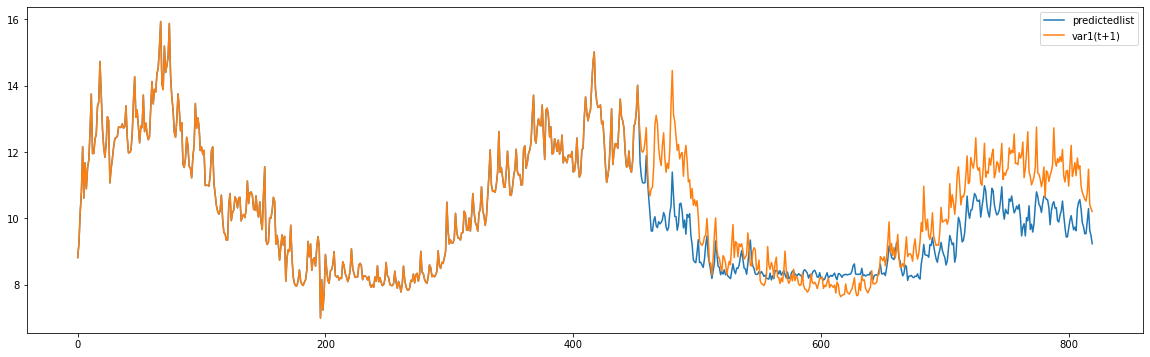

In [414]:
reframed[["predictedlist","var1(t+1)"]].plot(figsize=(20,6));

Text(0.5, 0, 'Time')

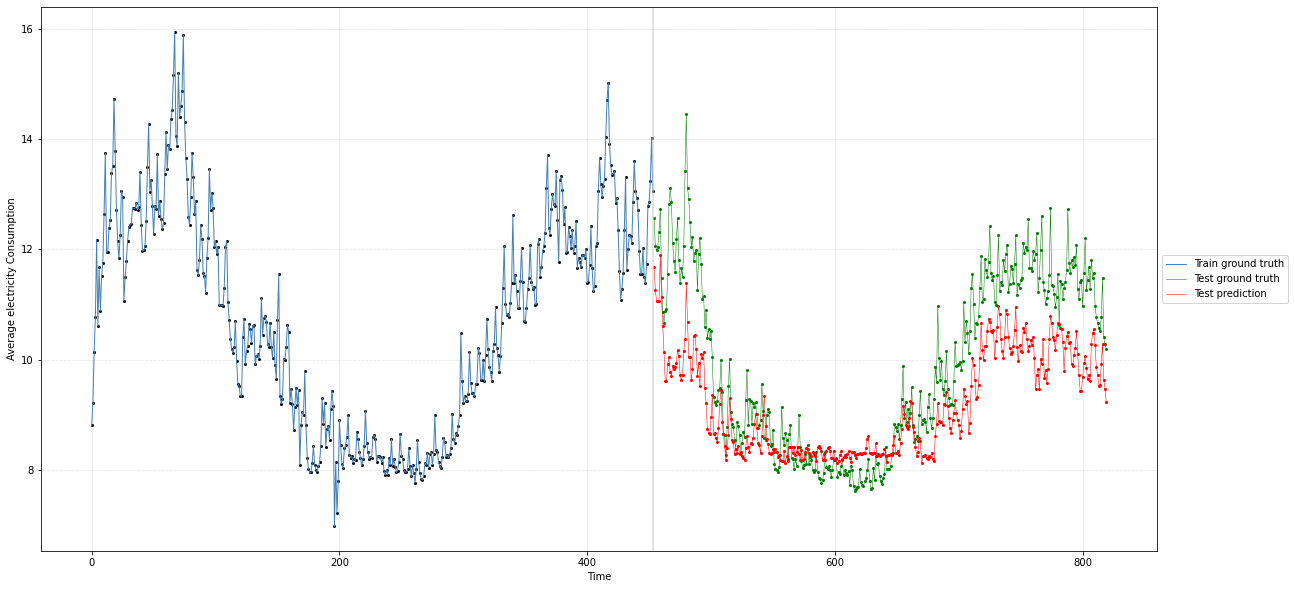

In [415]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(20, 10), sharex=True)

train = reframed[:454]
axes.plot(train.index, train['var1(t+1)'], 'ko', markersize=2, )
axes.plot(train.index, train['var1(t+1)'], color='steelblue', lw=1,label='Train ground truth')

test = reframed[454:]
axes.plot(test.index, test['var1(t+1)'], 'go', markersize=2, )
axes.plot(test.index, test['var1(t+1)'], 'g', lw=0.5, label='Test ground truth')
axes.plot(test.index, test.predictedlist, color='red', lw=0.5, label='Test prediction')
axes.plot(test.index, test.predictedlist, 'ro', markersize=2, )

axes.axvline(train.index[-1], color='0.8', alpha=0.7)
axes.set_ylabel(f'Average electricity Consumption')
axes.grid(ls=':', lw=0.5)
axes.legend(loc='center left', bbox_to_anchor=(1,0.5))
axes.set_xlabel('Time')

In [416]:
import numpy as np
from sklearn.metrics import mean_absolute_error


print(mean_absolute_error(y_true, pred_list))

0.8817319476841068


In [417]:
#import the libraries for error calculation
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

#Calculate error of the MLP model with RMSE, MSE, MAE, MAPE
print("RMSE: ",mean_squared_error(y_true, pred_list))
print("MSE: ",mean_squared_error(y_true, pred_list, squared=False))
print("MAE: ",mean_absolute_error(y_true, pred_list))
print("MAPE: ",mean_absolute_percentage_error(y_true, pred_list))

RMSE:  1.2309910961987267
MSE:  1.1095003813423079
MAE:  0.8817319476841068
MAPE:  0.08214890409986057
